In [6]:
data = pd.read_csv('C:\Project\ineuron-assessment\Machiene Learning\data\instagram_reach.csv')
data.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [8]:
data.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [16]:
import pandas as pd

data = pd.read_csv('C:\Project\ineuron-assessment\Machiene Learning\data\instagram_reach.csv')

# Drop non-numeric columns
numeric_columns = ['Followers', 'Time since posted', 'Likes']

for column in numeric_columns:
    unique_values = data[column].unique()
    print(f'Unique values in {column}: {unique_values}')


Unique values in Followers: [1600  880  255  340  304 1231  259 1433   13  450  149 2232 1061  533
 2904  971  285  520   75 2691  966  334 1041 4496  166 1211  265 1618
  279  828   12  894  610  226 1168  835  124  193  258  105  273  914
  118  122 1180 3139 3725  935 1766 2277  348   87 2785 3448  530 3147
  918  145   11  577   66   89 2014  151 2175  371 1003 1200  383  955
 2372  740 2573  181  631  246  460  140  888  845   91  361 2455  262
 1158 1196  863  106  179   49  614  182 2039  741]
Unique values in Time since posted: ['11 hours' '2 hours' '3 hours' '4 hours' '7 hours' '8 hours' '9 hours'
 '5 hours' '20 hours' '14 hours' '24 hours']
Unique values in Likes: [139  23  25  49  30  18  35  86  22  31  48  80  94  28  53  29  46  34
 198  19  20  11  10 148  43  37  90  14 273  13  93  24 136   8  41  81
  16  51 157  17  65 349  21  27  40  50 119  55  12  33   9  32  42 222
 109]


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('C:\Project\ineuron-assessment\Machiene Learning\data\instagram_reach.csv')

# Drop non-numeric columns
numeric_columns = ['Followers', 'Time since posted', 'Likes']
data_numeric = data[numeric_columns]

# Convert 'Time since posted' to numeric by extracting numeric part and converting it to hours
data_numeric['Time since posted'] = data_numeric['Time since posted'].str.extract('(\d+)').astype(float)

# Handle non-numeric values in 'Followers' and 'Likes' by imputing missing values with median
data_numeric['Followers'] = pd.to_numeric(data_numeric['Followers'], errors='coerce')
data_numeric['Likes'] = pd.to_numeric(data_numeric['Likes'], errors='coerce')

# Impute missing values with the median of each feature
imputer = SimpleImputer(strategy='median')
data_numeric_imputed = pd.DataFrame(imputer.fit_transform(data_numeric), columns=data_numeric.columns)

# Split the dataset into features
X = data_numeric_imputed.drop('Likes', axis=1)  
y_likes = data_numeric_imputed['Likes']  
# Split the dataset into training and testing sets
X_train, X_test, y_likes_train, y_likes_test = train_test_split(X, y_likes, test_size=0.2, random_state=42)

# Initialize and train the model for predicting likes
model_likes = LinearRegression()
model_likes.fit(X_train, y_likes_train)

# Make predictions on the testing set for likes
likes_predictions = model_likes.predict(X_test)

# Evaluate the model for likes
likes_mse = mean_squared_error(y_likes_test, likes_predictions)
print('Mean Squared Error (Likes):', likes_mse)


C:\Users\chirag\AppData\Local\Temp\ipykernel_11924\1327494030.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numeric['Time since posted'] = data_numeric['Time since posted'].str.extract('(\d+)').astype(float)
C:\Users\chirag\AppData\Local\Temp\ipykernel_11924\1327494030.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numeric['Followers'] = pd.to_numeric(data_numeric['Followers'], errors='coerce')
C:\Users\chirag\AppData\Local\Temp\ipykernel_11924\1327494030.py:19: SettingWithCopyWarning

Mean Squared Error (Likes): 541.0121910944121


In [24]:
# Split the dataset into features (X) and target variables (y_time_since_posted)
y_time_since_posted = data_numeric_imputed['Time since posted']  # Target variable for predicting time since posted

# Split the dataset into training and testing sets for time since posted
X_train_time, X_test_time, y_time_train, y_time_test = train_test_split(X, y_time_since_posted, test_size=0.2, random_state=42)

# Initialize and train the model for predicting time since posted
model_time = LinearRegression()
model_time.fit(X_train_time, y_time_train)

# Make predictions on the testing set for time since posted
time_predictions = model_time.predict(X_test_time)

# Evaluate the model for time since posted
time_mse = mean_squared_error(y_time_test, time_predictions)
print('Mean Squared Error (Time Since Posted):', time_mse)


Mean Squared Error (Time Since Posted): 1.1537090738857297e-30


In [25]:
# Make predictions on the entire dataset for likes
all_likes_predictions = model_likes.predict(X)

# Make predictions on the entire dataset for time since posted
all_time_predictions = model_time.predict(X)

# Create a DataFrame to store the predictions
predictions_df = pd.DataFrame({'Predicted Likes': all_likes_predictions, 'Predicted Time Since Posted': all_time_predictions})

# Display the predictions DataFrame
print(predictions_df)


    Predicted Likes  Predicted Time Since Posted
0        125.743153                         11.0
1         33.520574                          2.0
2         30.068082                          2.0
3         40.342655                          3.0
4         40.143791                          3.0
..              ...                          ...
95        41.856228                          3.0
96        40.950294                          3.0
97        39.469865                          3.0
98        49.727910                          3.0
99        42.557774                          3.0

[100 rows x 2 columns]


In [26]:
# Save the predictions DataFrame to a CSV file
predictions_df.to_csv('predictions.csv', index=False)


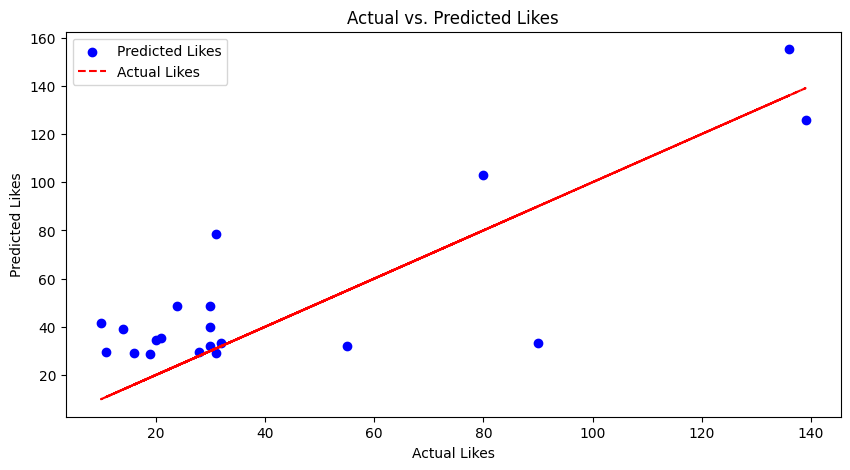

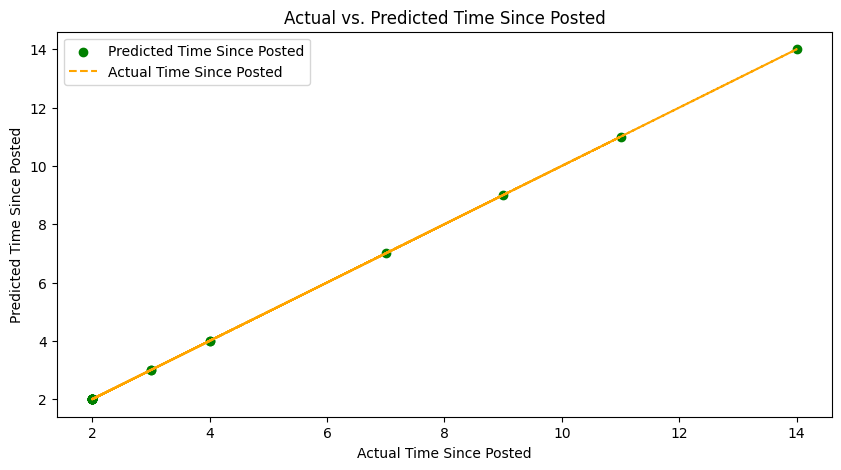

In [27]:
import matplotlib.pyplot as plt

# Plot predicted likes vs. actual likes
plt.figure(figsize=(10, 5))
plt.scatter(y_likes_test, likes_predictions, color='blue', label='Predicted Likes')
plt.plot(y_likes_test, y_likes_test, color='red', linestyle='--', label='Actual Likes')
plt.xlabel('Actual Likes')
plt.ylabel('Predicted Likes')
plt.title('Actual vs. Predicted Likes')
plt.legend()
plt.show()

# Plot predicted time since posted vs. actual time since posted
plt.figure(figsize=(10, 5))
plt.scatter(y_time_test, time_predictions, color='green', label='Predicted Time Since Posted')
plt.plot(y_time_test, y_time_test, color='orange', linestyle='--', label='Actual Time Since Posted')
plt.xlabel('Actual Time Since Posted')
plt.ylabel('Predicted Time Since Posted')
plt.title('Actual vs. Predicted Time Since Posted')
plt.legend()
plt.show()


In [28]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate additional evaluation metrics for likes
likes_mae = mean_absolute_error(y_likes_test, likes_predictions)
likes_r2 = r2_score(y_likes_test, likes_predictions)
likes_rmse = mean_squared_error(y_likes_test, likes_predictions, squared=False)

print('Mean Absolute Error (Likes):', likes_mae)
print('R-squared (Likes):', likes_r2)
print('Root Mean Squared Error (Likes):', likes_rmse)

# Calculate additional evaluation metrics for time since posted
time_mae = mean_absolute_error(y_time_test, time_predictions)
time_r2 = r2_score(y_time_test, time_predictions)
time_rmse = mean_squared_error(y_time_test, time_predictions, squared=False)

print('Mean Absolute Error (Time Since Posted):', time_mae)
print('R-squared (Time Since Posted):', time_r2)
print('Root Mean Squared Error (Time Since Posted):', time_rmse)


Mean Absolute Error (Likes): 18.497853347786005
R-squared (Likes): 0.6183678779549551
Root Mean Squared Error (Likes): 23.25966876579312
Mean Absolute Error (Time Since Posted): 5.551115123125783e-16
R-squared (Time Since Posted): 1.0
Root Mean Squared Error (Time Since Posted): 1.0741085019148343e-15


In [29]:
# Retrieve coefficients for likes model
likes_coefficients = model_likes.coef_
likes_feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': likes_coefficients})
likes_feature_importance.sort_values(by='Coefficient', ascending=False, inplace=True)

# Print feature importance for likes
print('Feature Importance for Likes:')
print(likes_feature_importance)

# Retrieve coefficients for time since posted model
time_coefficients = model_time.coef_
time_feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': time_coefficients})
time_feature_importance.sort_values(by='Coefficient', ascending=False, inplace=True)

# Print feature importance for time since posted
print('Feature Importance for Time Since Posted:')
print(time_feature_importance)


Feature Importance for Likes:
             Feature  Coefficient
1  Time since posted     9.805034
0          Followers     0.005524
Feature Importance for Time Since Posted:
             Feature   Coefficient
1  Time since posted  1.000000e+00
0          Followers  2.452581e-19


In [31]:
data = pd.read_csv('C:\Project\ineuron-assessment\Machiene Learning\data\instagram_reach.csv')

# Drop non-numeric columns
numeric_columns = ['Followers', 'Time since posted', 'Likes']
data_numeric = data[numeric_columns]

# Convert 'Time since posted' to numeric by extracting numeric part and converting it to hours
data_numeric['Time since posted'] = data_numeric['Time since posted'].str.extract('(\d+)').astype(float)

# Handle non-numeric values in 'Followers' and 'Likes' by imputing missing values with median
data_numeric['Followers'] = pd.to_numeric(data_numeric['Followers'], errors='coerce')
data_numeric['Likes'] = pd.to_numeric(data_numeric['Likes'], errors='coerce')
data_numeric = data_numeric.fillna(data_numeric.median())

# Split the dataset into features (X) and target variables (y)
X = data_numeric.drop(['Likes', 'Time since posted'], axis=1)  # Features
y = data_numeric[['Likes', 'Time since posted']]  # Target variables for prediction

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the multi-output regression model
multioutput_regressor = MultiOutputRegressor(LinearRegression())
multioutput_regressor.fit(X_train, y_train)

# Make predictions on the testing set
predictions = multioutput_regressor.predict(X_test)

# Evaluate the model using mean squared error
mse_likes = mean_squared_error(y_test['Likes'], predictions[:, 0])
mse_time = mean_squared_error(y_test['Time since posted'], predictions[:, 1])

print('Mean Squared Error (Likes):', mse_likes)
print('Mean Squared Error (Time Since Posted):', mse_time)


C:\Users\chirag\AppData\Local\Temp\ipykernel_11924\2131900737.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numeric['Time since posted'] = data_numeric['Time since posted'].str.extract('(\d+)').astype(float)
C:\Users\chirag\AppData\Local\Temp\ipykernel_11924\2131900737.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numeric['Followers'] = pd.to_numeric(data_numeric['Followers'], errors='coerce')
C:\Users\chirag\AppData\Local\Temp\ipykernel_11924\2131900737.py:12: SettingWithCopyWarning:

Mean Squared Error (Likes): 1188.9795867020523
Mean Squared Error (Time Since Posted): 11.402562709203291
